# Building a Neural Network using Keras

### Problem

We have a dataset containing weight and wing length measurements of 168 birds in a rainforest. There are three species of interest in this study. Unfortunately, there was a data entry error: one of the researchers took all the necessary measurements of 20 birds, but did not include the species of these birds in his record. Returning to the rainforest to correct this mistake is expensive, both logistically and resource-wise. The team opts to use the complete data they already have on the other  148 birds to figure out what the species of these 20 birds could be.

### Task

Build a neural network to predict what species these 20 birds belong to.

## Introduction

In our initial exploration of this classification task, we built a basic neural network without any hyperparameter tuning. In this notebook, we will revisit this basic network configuration and additionally develop another neural network that has undergone hyperparameter tuning. By comparing these two models, we aim to evaluate their respective performances and highlight the impact of hyperparameter optimisation.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
keras.utils.set_random_seed(1)

In [54]:
data = pd.read_csv('Bird_Data_missing.txt', delimiter = ' ')
data.head()

,Firewing,Shadowhawk,Thunderbeaks,Wing,Weight
0,1,0,0,0.372,0.915
1,1,0,0,0.371,1.160
2,1,0,0,0.469,1.001
3,1,0,0,0.262,1.020
4,1,0,0,0.375,0.950


In [55]:
# Getting the wing and weight measurements of incomplete records (the last 20 records)
incomplete_records = data.iloc[148:,[3,4]]

In [56]:
incomplete_records

,Wing,Weight
148,0.218,0.378
149,0.367,0.545
150,0.409,0.601
151,0.168,0.279
152,0.289,0.482
153,0.336,0.528
154,0.186,0.315
155,0.258,0.426
156,0.397,0.579
157,0.198,0.342


In [57]:
# Using only the 148 birds with complete data for training
data = data.iloc[:148,:]
data.tail()

,Firewing,Shadowhawk,Thunderbeaks,Wing,Weight
143,0,0,1,0.273,0.530
144,0,0,1,0.243,0.334
145,0,0,1,0.194,0.163
146,0,0,1,0.145,0.320
147,0,0,1,0.225,0.325


In [58]:
# Extracting features and labels
X = data.loc[:, ['Wing', 'Weight']]
y = data.loc[:, ['Firewing', 'Shadowhawk', 'Thunderbeaks']]

In [59]:
y

,Firewing,Shadowhawk,Thunderbeaks
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
143,0,0,1
144,0,0,1
145,0,0,1
146,0,0,1


In [60]:
# Split the data into training, validation, and testing sets
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

* current: train/val/test --> 0.7/0.15/0.15

In [61]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Building a Neural Network with No Hyperparameter Tuning

In [62]:
# Define the Neural Network model
model_no_tuning = Sequential()
model_no_tuning.add(Dense(8, input_dim=2, activation='relu')) # hidden layer
model_no_tuning.add(Dense(3, activation='softmax')) # output layer

# Compile the model
model_no_tuning.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_no_tuning.fit(X_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1903 - accuracy: 0.2816
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.1726 - accuracy: 0.2816
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.1569 - accuracy: 0.3495
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.1404 - accuracy: 0.4272
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.1248 - accuracy: 0.4272
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.1085 - accuracy: 0.4272
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0932 - accuracy: 0.4272
Epoch 8/1000
4/4 [==============================] - 0s 969us/step - loss: 1.0783 - accuracy: 0.4272
Epoch 9/1000
4/4 [==============================] - 0s 988us/step - loss: 1.0631 - accuracy: 0.4272
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0490 - accuracy: 0.4272
Epoch 11/1000
4

In [63]:
# Evaluate model on both validation and test sets
loss_val, accuracy_val = model_no_tuning.evaluate(X_val, y_val, verbose=1)
loss_test, accuracy_test = model_no_tuning.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 16ms/step - loss: 0.2480 - accuracy: 0.9565


In [64]:
print(f"Accuracy of model with no tuning on validation set: {accuracy_val*100:.2f}%")
print(f"Accuracy of model with no tuning on test set: {accuracy_test*100:.2f}%")

Accuracy of model with no tuning on validation set: 90.91%
Accuracy of model with no tuning on test set: 95.65%


# Building a Neural Network with Hyperparameter Tuning

 Because we will be testing out different combinations of hyperparameters to determine the optimal values to use, we will create a function that builds the neural network. We will simply call the function, build_neural_network(), for each iteration where we want to test out a different hyperparameter combination.

In [65]:
# Function to build the model
def build_neural_network(activation, reg_strength, num_nodes):
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=2, activation=activation, kernel_regularizer=l2(reg_strength))) # Hidden layer
    model.add(Dense(3, activation='softmax')) # Output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [66]:
# Set up hyperparameter grid
param_grid = {
    'neurons': [6, 8, 10, 12, 16],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'reg_strength': [0.1, 0.01, 0.001, 0.0001, None]
}

# Initialise variables to track the best model
best_accuracy = 0.0
best_params = None
best_model = None

The code below manually implements grid search logic to determine the best combination of hyperparameters for our problem.

In [68]:
# Iterate over the hyperparameter grid
for neurons in param_grid['neurons']:
    for activation in param_grid['activation']:
        for reg_strength in param_grid['reg_strength']:

            print(f"Training model with {neurons} neurons, {activation} activation, and regularisation strength {reg_strength}")

            model = build_neural_network(activation=activation, reg_strength=reg_strength, num_nodes=neurons)
            model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

            print(f"Accuracy on validation set: {accuracy*100:.2f}%")

            # Update the best model if the current one is better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'neurons': neurons, 'activation': activation, 'reg_strength': reg_strength}
                best_model = model

Training model with 6 neurons, relu activation, and regularisation strength 0.1
Accuracy on validation set: 90.91%
Training model with 6 neurons, relu activation, and regularisation strength 0.01
Accuracy on validation set: 81.82%
Training model with 6 neurons, relu activation, and regularisation strength 0.001
Accuracy on validation set: 86.36%
Training model with 6 neurons, relu activation, and regularisation strength 0.0001
Accuracy on validation set: 86.36%
Training model with 6 neurons, relu activation, and regularisation strength None
Accuracy on validation set: 90.91%
Training model with 6 neurons, tanh activation, and regularisation strength 0.1
Accuracy on validation set: 86.36%
Training model with 6 neurons, tanh activation, and regularisation strength 0.01
Accuracy on validation set: 86.36%
Training model with 6 neurons, tanh activation, and regularisation strength 0.001
Accuracy on validation set: 86.36%
Training model with 6 neurons, tanh activation, and regularisation str

In [69]:
# Output details of optimal model
print(f"Best Model Results \nNeurons: {best_params['neurons']} \nActivation: {best_params['activation']} \nReg Strength: {best_params['reg_strength']} \nAccuracy on validation set: {best_accuracy * 100:.2f}%")

Best Model Results 
Neurons: 6 
Activation: relu 
Reg Strength: 0.001 
Accuracy on validation set: 95.45%


In [70]:
loss_best, accuracy_best = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy of model with hyperparameter tuning on test set: {accuracy_best*100:.2f}%")

Accuracy of model with hyperparameter tuning on test set: 95.65%


In [73]:
incomplete_records.iloc[[1],:]

,Wing,Weight
149,0.367,0.545


In [98]:
pred = best_model.predict(incomplete_records.iloc[[17],:])
species = ['Firewing', 'Shadowhawk', 'Thunderbeaks']
print(f"{species[np.argmax(pred)]} with confidence {np.max(pred)*100:.2f}")

1/1 [==============================] - 0s 12ms/step
Thunderbeaks with confidence 95.33


## Comparison

The test set accuracy of our basic model with no tuning was 78%. In contrast, our tuned model achieved an accuracy of 91% on the test set. It is evident that undergoing the process of hyperparameter optimisation was highly beneficial, yielding a more powerful and reliable model for predicting the species in incomplete records.

## Further Evaluation of Best Model

We will generate a confusion matrix to identify the incorrect predictions made by our best model.

1/1 [==============================] - 0s 27ms/step


Text(0.5, 1.0, 'Confusion Matrix')

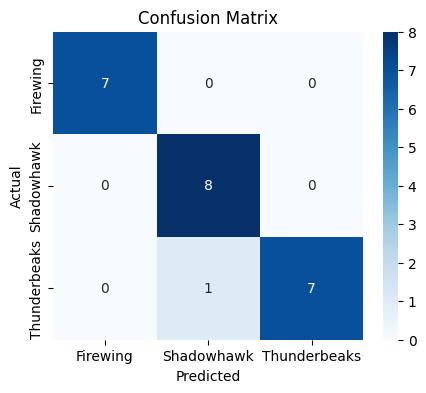

In [99]:
# Evaluate the best model
y_pred = np.argmax(best_model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to labels
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=['Firewing', 'Shadowhawk', 'Thunderbeaks'], yticklabels=['Firewing', 'Shadowhawk', 'Thunderbeaks'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

Our model incorrectly predicted that 4 birds belonged to the Shadowhawk species, when they were actually Thunderbeaks.